
                                      Analysis of Covid-19 Data

In 2020, the entire world was hit by the deadly covid pandemic. Countries like India and USA reported as much as 2,00,000 cases daily. The death toll increased significantly. Offices shut, hotels closed, travel banned, we experienced it all during this pandemic. The situation has improved slightly almost a year and half later or has it? We still hear a few cases and deaths are still being reported. The best way to find out the real situation? Yes, through statistics. Numbers don't lie.

The goal of this notebook is to perform extensive data analysis on official covid statistics pulled from ourworldindata.org . We scrutinize the number of cases, deaths, vaccine rates, hospital beds availability and correlations of different factors.

Let's jump right into it!

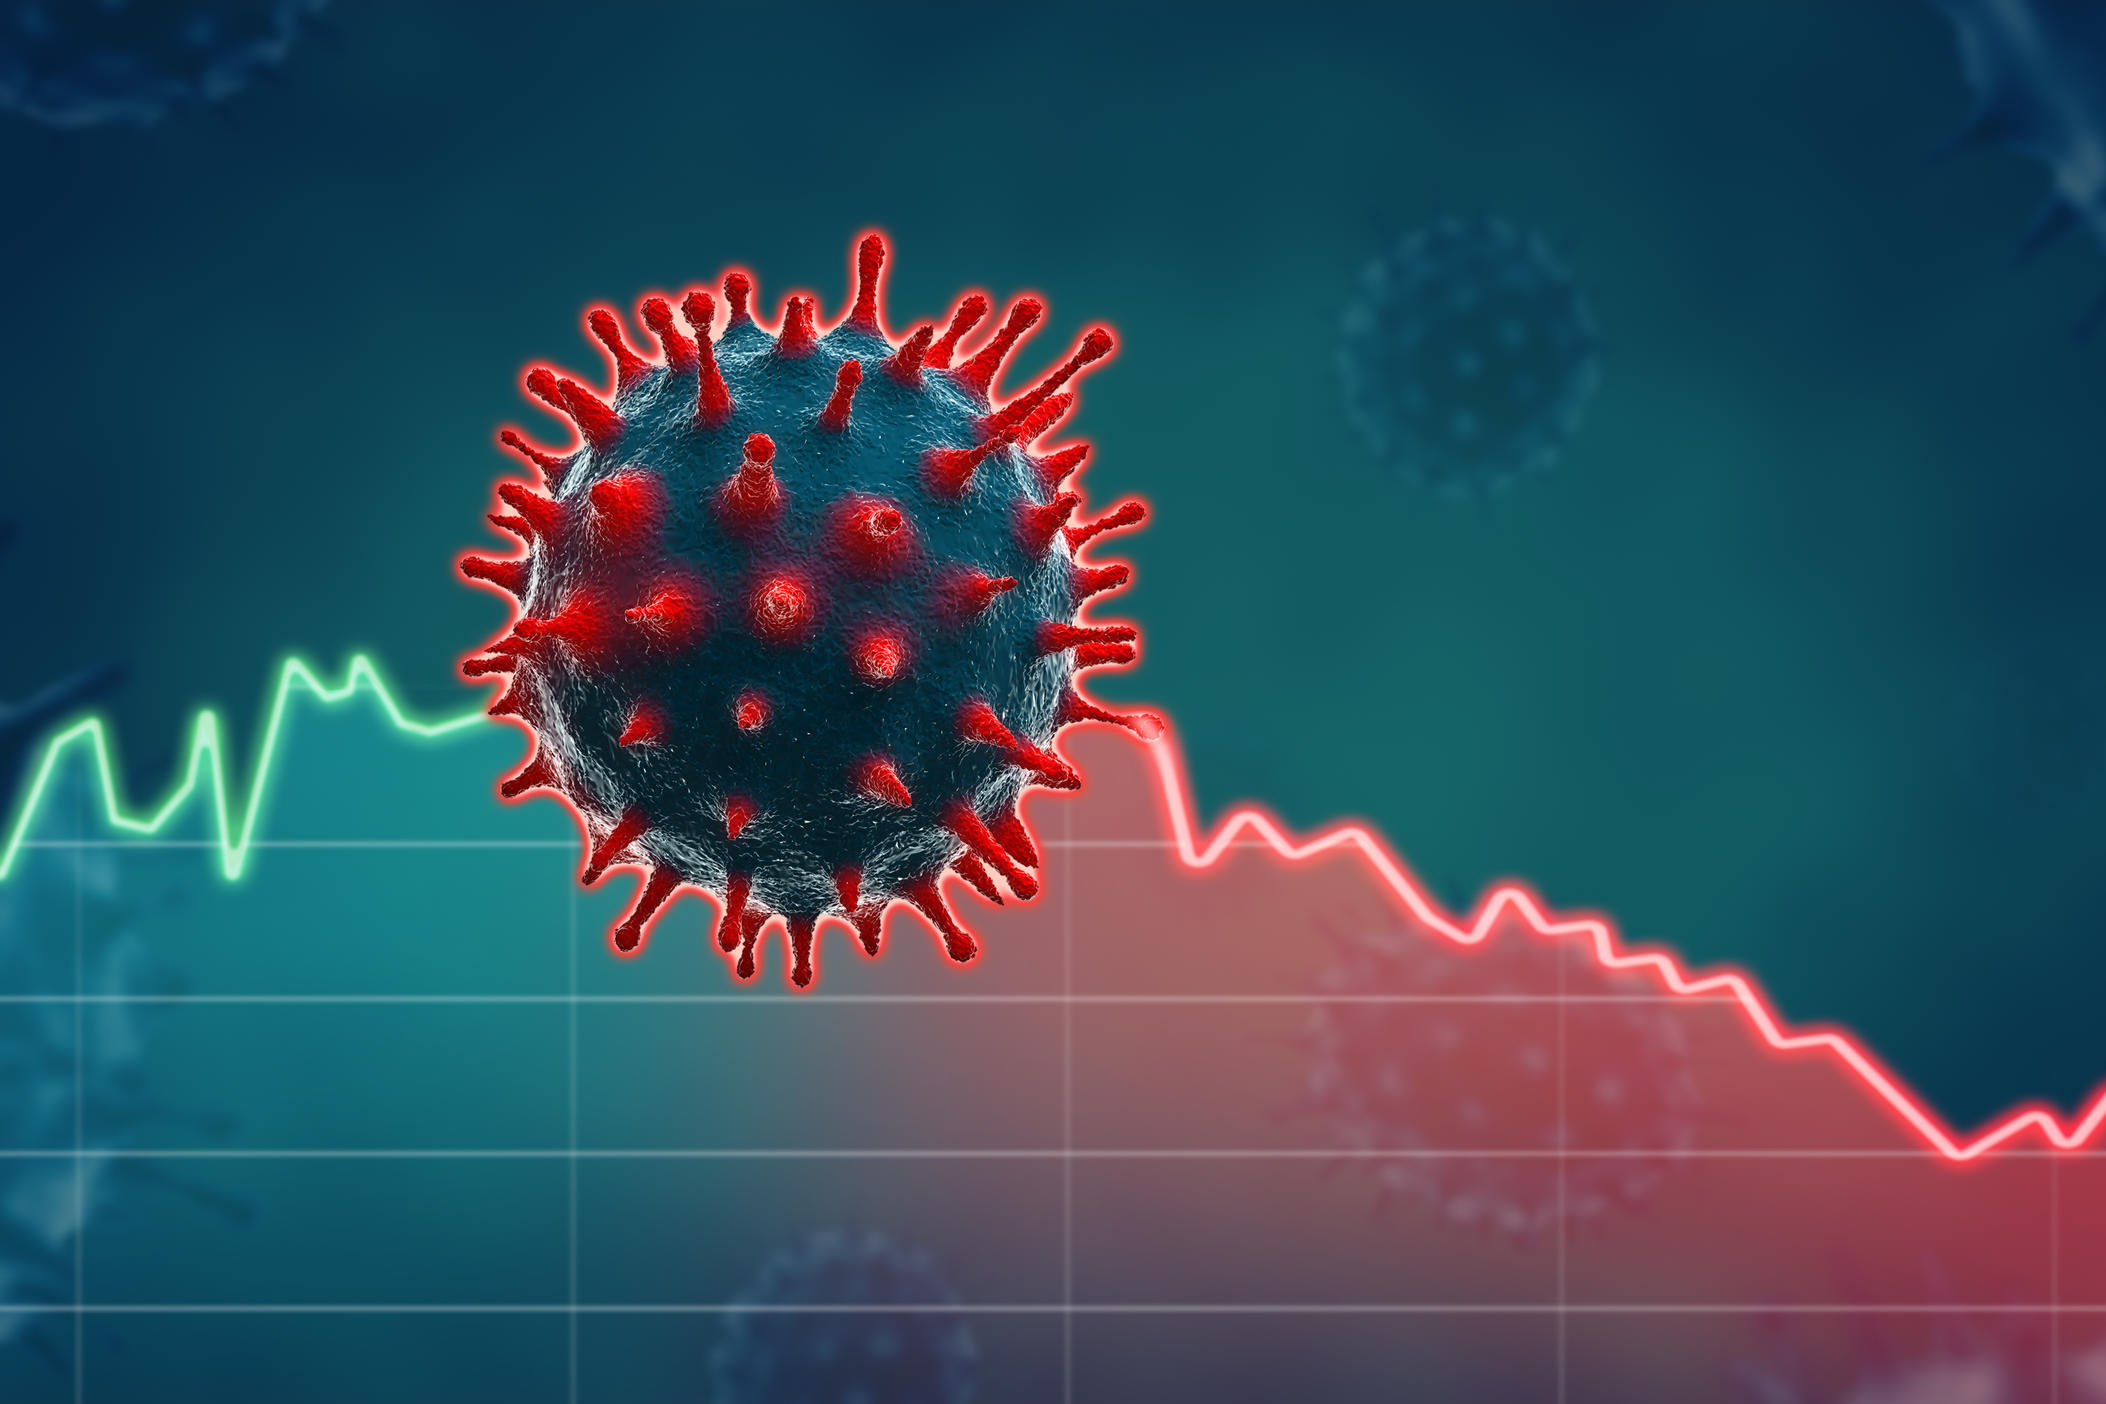

In [ ]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Reading csv file

df = pd.read_csv("/Users/rohan/Documents/Studies/Miscellaneous/DataAnalystProject1/Covid_Data.csv")

Analyzing the body of the dataframe

In [185]:
df.head()
df.tail()
df.describe()
df.shape            #124889 rows and 65 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124889 entries, 0 to 124888
Data columns (total 69 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   iso_code                                 124889 non-null  object        
 1   continent                                119230 non-null  object        
 2   location                                 124889 non-null  object        
 3   date                                     124889 non-null  object        
 4   total_cases                              118144 non-null  float64       
 5   new_cases                                124889 non-null  float64       
 6   new_cases_smoothed                       117126 non-null  float64       
 7   total_deaths                             107243 non-null  float64       
 8   new_deaths                               124889 non-null  float64       
 9   new_deaths_smoothed       

In [4]:
df.isna().sum() 

iso_code                                        0
continent                                    5659
location                                        0
date                                            0
total_cases                                  6745
new_cases                                    6749
new_cases_smoothed                           7763
total_deaths                                17646
new_deaths                                  17493
new_deaths_smoothed                          7763
total_cases_per_million                      7366
new_cases_per_million                        7370
new_cases_smoothed_per_million               8379
total_deaths_per_million                    18254
new_deaths_per_million                      18101
new_deaths_smoothed_per_million              8379
reproduction_rate                           24348
icu_patients                               109663
icu_patients_per_million                   109663
hosp_patients                              107525


Uh-oh! Looks like there are multiple null values. Since most of them are numerical, we can fix them by adding 0 in place of NA. 

Note: We CANNOT fill 0 for columns we don't have a clue about like 'population','life expectancy','handwashing_facilities',etc. Replacing null values with 0 wont be approptiate in the context and leaving it untouched would be our best option.

In [4]:
# Adding 0 in place of NA for study columns.

df[["new_cases","new_deaths","new_cases_per_million","new_deaths_per_million","icu_patients","icu_patients_per_million","hosp_patients","hosp_patients_per_million","weekly_icu_admissions","weekly_icu_admissions_per_million","weekly_hosp_admissions","weekly_hosp_admissions_per_million","new_tests","new_tests_per_thousand"]]=df[["new_cases","new_deaths","new_cases_per_million","new_deaths_per_million","icu_patients","icu_patients_per_million","hosp_patients","hosp_patients_per_million","weekly_icu_admissions","weekly_icu_admissions_per_million","weekly_hosp_admissions","weekly_hosp_admissions_per_million","new_tests","new_tests_per_thousand"]].fillna(0)

# Creating new columns for month and year

df.info()            # date column is not a date object. It needs to be converted to date time object and then extract month and year from it.
df["Date_Converted"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")
df["Date_Converted"]
df["Month"] = df["Date_Converted"].dt.month
df["Year"] = df["Date_Converted"].dt.year

#Create a column for month names:
dict_months = {1:"Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8:"Aug", 9:"Sep" , 10: "Oct",11: "Nov", 12: "Dec"}                                      
df["Month Name"] = df["Month"].apply(lambda x: dict_months[x] if x in dict_months.keys() else "NA")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124889 entries, 0 to 124888
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 124889 non-null  object 
 1   continent                                119230 non-null  object 
 2   location                                 124889 non-null  object 
 3   date                                     124889 non-null  object 
 4   total_cases                              118144 non-null  float64
 5   new_cases                                124889 non-null  float64
 6   new_cases_smoothed                       117126 non-null  float64
 7   total_deaths                             107243 non-null  float64
 8   new_deaths                               124889 non-null  float64
 9   new_deaths_smoothed                      117126 non-null  float64
 10  total_cases_per_million         

- Find out top 10 countries with the highest number of cases

Since location column contains continents as well along with countries, we need to get rid of all the values apart from countries for our analysis. This has been done through a list defining all the miscellaneous locations.
These locations are then removed from the dataframe as and when required.

<ipython-input-186-d90eeba4ab8e>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Countries that recorded the most number of covid 19 cases')

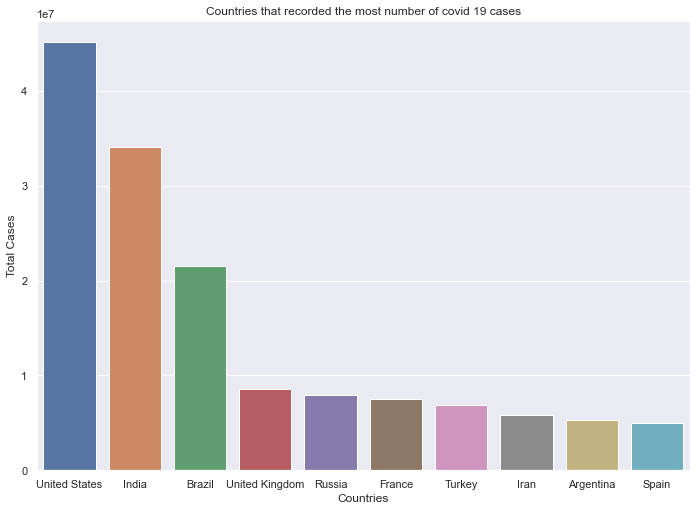

In [186]:
# Location column also includes continents and 'World' which is not required for our analysis. A list would be used to remove those values from our dataframe.
misc_locations = ["Asia", "Africa", "Europe", "North America", "South America", "Oceania", "World", "European Union"] 

df_cases = df.groupby(["location"],as_index=False)["location","new_cases"].sum().sort_values("new_cases",ascending=False)
df_cases  = df_cases[df_cases["location"].isin(misc_locations) == False][:10]      # To remove values from location which are NOT countries
df_cases

# Bar Plot using seaborn:

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig1 = sns.barplot(x=df_cases.location, y=df_cases.new_cases, data=df_cases)
fig1.set(xlabel = "Countries", ylabel = "Total Cases")
fig1.set_title("Countries that recorded the most number of covid 19 cases")


Analysis: United States, India and Brazil were the top 3 countries that experienced maximum covid-19 cases.
Being from India, I understand how difficut was the past year. With nearly 50 cases in every locality, it was a pain to even step out of the house.

[Text(0, 0, 'India'),
 Text(1, 0, 'United States'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Brazil'),
 Text(4, 0, 'Spain'),
 Text(5, 0, 'United Kingdom'),
 Text(6, 0, 'Kazakhstan'),
 Text(7, 0, 'Turkey'),
 Text(8, 0, 'Indonesia'),
 Text(9, 0, 'Iran')]

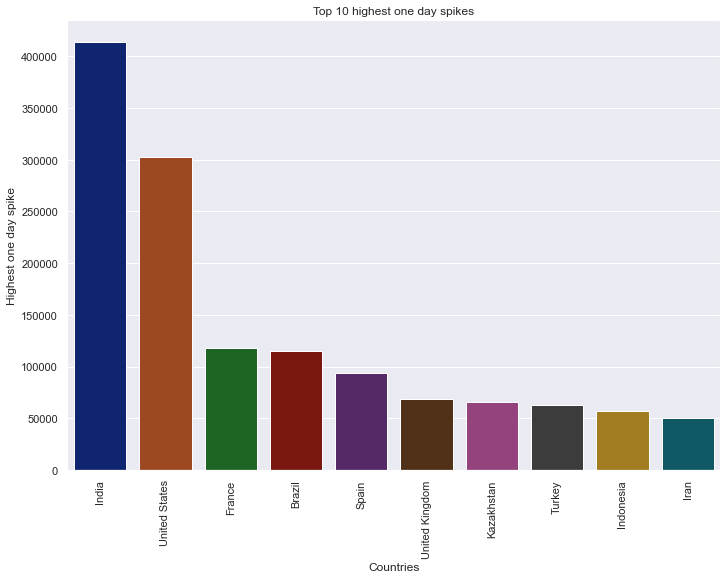

In [48]:
# Countries recording highest one day spike

df_spike = df.groupby(["location"],as_index=False)["new_cases"].max().sort_values(by = ["new_cases"],ascending=False)
df_spike = df_spike[df_spike["location"].isin(misc_locations)==False][:10]
df_spike

p_spikes = sns.barplot(x="location",y="new_cases",data=df_spike,palette="dark")
p_spikes.set(xlabel = "Countries", ylabel = "Highest one day spike")
p_spikes.set_title("Top 10 highest one day spikes")
p_spikes.set_xticklabels(p_spikes.get_xticklabels(), rotation = 90)


India recorded the highest 1 day spike with over 4 lakh cases in a single day. Can you even imagine that!!
4 lakh cases in a single day. United States wasn't far behind with approximately 3 lakh cases in a single day.

- Finding out top 10 countries with the highest number of deaths

<ipython-input-5-6c68570c642d>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby(["location"],as_index=False)["location","new_deaths"].sum().sort_values("new_deaths",ascending=False)


Text(0.5, 1.0, 'Countries with the most number of deaths due to covid 19')

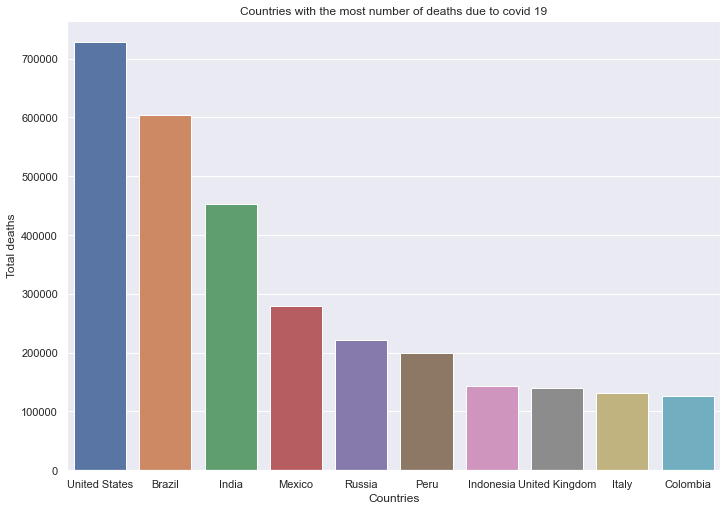

In [5]:
df1 = df.groupby(["location"],as_index=False)["location","new_deaths"].sum().sort_values("new_deaths",ascending=False)
df1  = df1[df1["location"].isin(misc_locations) == False][:10]      # To remove values from location which are NOT countries
df1

# Seaborn plot:

sns.set(rc={'figure.figsize':(11.7,8.27)})
fig1 = sns.barplot(x=df1.location, y=df1.new_deaths, data=df1)
fig1.set(xlabel = "Countries", ylabel = "Total deaths")
fig1.set_title("Countries with the most number of deaths due to covid 19")


USA, Brazil and India had the most number of deaths due to covid 19 with a total of nearly 17.5 lakh deaths between them. It is heartbreaking reading the number of deaths caused by covid-19. Vaccinations have imporved the situation. It will be discussed later in the notebook.

The word 'wave' had become synonymous to covid. First wave, second wave were all making the rounds in 2020. People had forgotten the dictionary definition of 'wave'.Such was the horrific impact of covid. The below two graphs analyze the deaths caused by covid 19 grupued by months. India experienced a deadly second wave with the maximum deaths taking place in the month of April, 2021. Let us see how did the number of deaths vary acoording to the months in the year 2020 and 2021. 

In [190]:
df2 = df[(df["location"].isin(df1.location[:5])==True) & (df["Year"] == 2020)].sort_values(by = "Month")  # Filtering original dataframe to analyse only the top 10 countries in terms of total deaths

df_2020_deaths = df2.groupby(["location", "Month"], as_index=False)["new_deaths"].sum()
p = px.line(df_2020_deaths,x="Month", y="new_deaths",line_group="location",color="location",labels={"new_deaths":"Total Deaths"}, title = "Distribution of deaths categorized by months in 2020")
p.update_xaxes(range=[1,12],dtick=1)
p.show()



- In the year 2020, USA had a major spike in the total deaths in the months of April and December. 
- India had a steady increase over April through  September after which it began to dip. 
- Russia experienced a steep rise through October to December.

Lets find out visualizations for the year 2021:


In [191]:
df3 = df[(df["location"].isin(df1.location[:5])==True) & (df["Year"] == 2021)].sort_values(by = "Month")  # Filtering original dataframe to analyse only the top 10 countries in terms of total deaths

df_2021_deaths = df3.groupby(["location", "Month"], as_index=False)["new_deaths"].sum()
p1 = px.line(df_2021_deaths,x="Month", y="new_deaths",line_group="location",color="location", labels={"new_deaths":"Total Deaths"},title="Distribution of deaths categorized by months in 2021")
p1.update_xaxes(range=[1,10], dtick=1)
p1.show()




- In 2021, India experienced a much higher increase in the total number of deaths in May. 
- Total deaths in the USA decreased significantly through the Jan to July after which it rose to some amount. 
- Brazil experienced peak in the total deaths in the month of April.

Analysing number of tests conducted by countries

<ipython-input-193-65b3abf3c908>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0, 0, 'United States'),
 Text(1, 0, 'India'),
 Text(2, 0, 'United Kingdom'),
 Text(3, 0, 'France'),
 Text(4, 0, 'Russia'),
 Text(5, 0, 'Italy'),
 Text(6, 0, 'Turkey'),
 Text(7, 0, 'Austria'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Canada')]

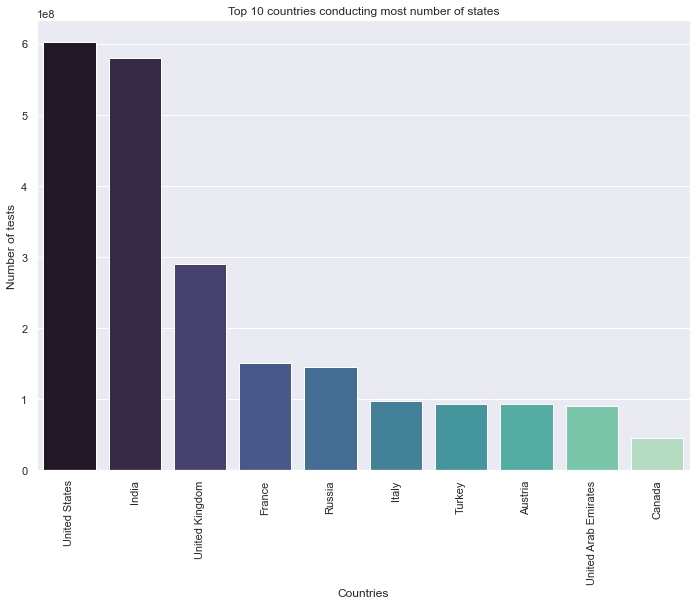

In [193]:

df.columns

df4 = df.groupby(["location"],as_index=False)["location","new_tests"].sum().sort_values("new_tests",ascending=False)[:10]
df4 = df4[df4["location"].isin(misc_locations) == False]
fig2 = sns.barplot(data = df4, x= "location" , y = "new_tests", palette = "mako")
fig2.set(xlabel = "Countries", ylabel = "Number of tests")
fig2.set_title("Top 10 countries conducting most number of states")
fig2.set_xticklabels(fig2.get_xticklabels(),rotation = 90)

United States, India and United Kingdom have conducted the most number of tests. 

- Analysing cases v/s hosp_patients v/s icu_patients

Since data for hospital and icu patients is not available for all the countries, we would perform our analysis on the countries who have reported hospital patients.

<ipython-input-220-6b2698312afa>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



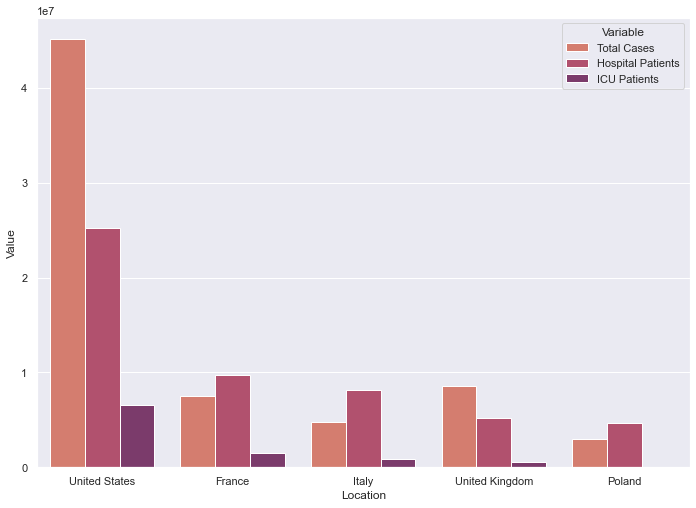

In [220]:
df4 = df.groupby(["location"],as_index=False)["new_cases","hosp_patients","icu_patients"].sum().sort_values(by=["hosp_patients","icu_patients"],ascending=False)[:5]
df4.rename(columns = {"new_cases":"Total Cases","hosp_patients":"Hospital Patients","icu_patients":"ICU Patients"},inplace=True)
df4 = df4.melt(id_vars='location').rename(columns=str.title)
df4

p_joint_graph = sns.barplot(data=df4, x= "Location", y="Value", hue="Variable",palette = "flare")



Ah! This one's surprsing. France and Italy reported higher hospital patients than the number of cases. More number of people would have visitied hospital thinking they had covid symptoms but would have never tested positive. 

- To find if there is a relationship between deaths and median ages of country. 

Text(0.5, 1.0, 'Total number of deaths v/s median age')

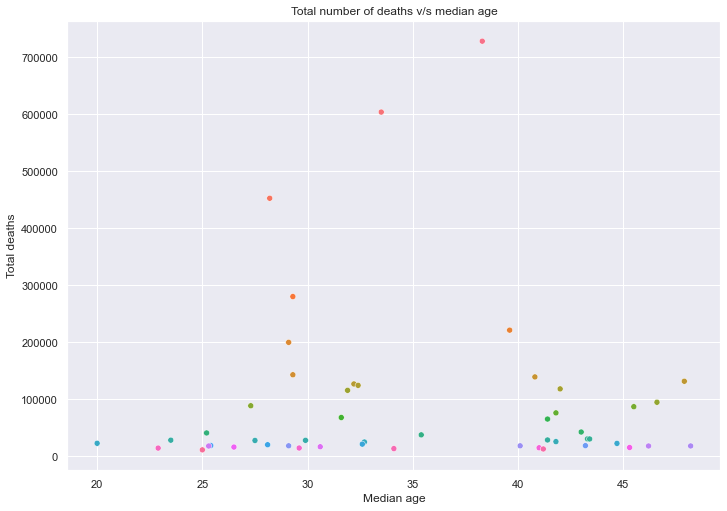

In [195]:
df_case_age = df[["location","new_deaths","median_age"]]
df_case_age = df_case_age.groupby(["location"],as_index=False).agg({"new_deaths":"sum","median_age":"mean"})
df_case_age = df_case_age[(df_case_age["location"].isin(misc_locations)==False)].sort_values(by = "new_deaths", ascending=False)[:50]
df_case_age                                                      

p_age = sns.scatterplot(x="median_age",y="new_deaths",hue="location",data = df_case_age, legend=False, markers=True)
p_age.set(xlabel = "Median age", ylabel = "Total deaths")
p_age.set_title("Total number of deaths v/s median age")

Majority of the countries having higher death rate have a median age between 25 and 35 while few of them have a median age as much as 45.

- Finding out correlations between vaccinations, hospital beds, handwashing facilities and life expectancies.

<AxesSubplot:>

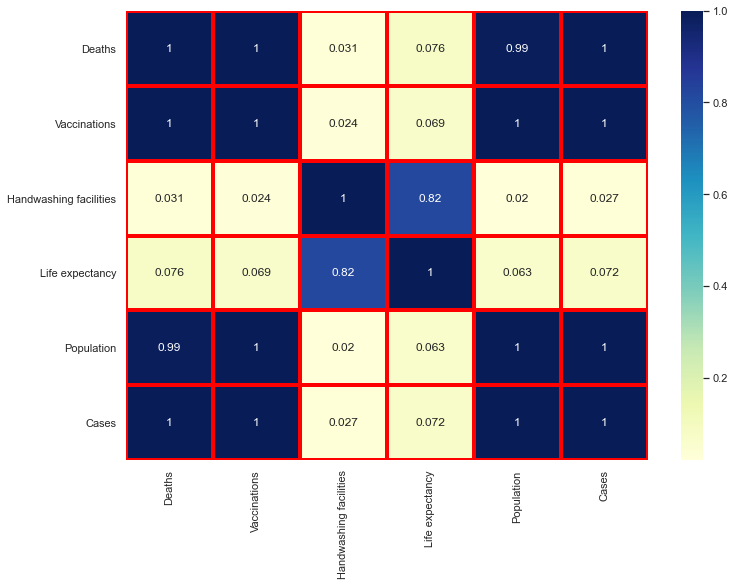

In [223]:

df_death_factors = df[(df["handwashing_facilities"].isna()==False) & (df["hospital_beds_per_thousand"].isna()==False) & (df["life_expectancy"].isna()==False) & (df["population"].isna()==False)]
df_death_factors = df_death_factors.groupby(["location"],as_index=False)["new_cases","new_deaths","new_vaccinations","handwashing_facilities","life_expectancy","population"].agg({"new_deaths":"sum","new_vaccinations":"sum","handwashing_facilities":"mean","life_expectancy":"mean","population":"mean","new_cases":"sum"})
df_death_factors.rename(columns={"new_deaths":"Deaths","new_vaccinations":"Vaccinations","handwashing_facilities":"Handwashing facilities","life_expectancy":"Life expectancy","population":"Population","new_cases":"Cases"},inplace=True)
sns.heatmap(df_death_factors.corr(),cmap= "YlGnBu", linewidths=3, linecolor="red",annot=True)


Total number of cases, deaths, population and vaccinations are all highly correlated with each other. This indicates densely populated countries were more prone to covid 19 as compared to others. There's a high correlation between life expectancy and handwashing facilties as well!

This brings us to the end of this notebook! Thank you for staying till the end. This notebook focusses on the factors affecting covid categorized by countries. Though there is a scope for lot more explorations, this notebook proves to be a decent template to begin a data analytics project.